# Chapter 2.4
### Example on non-conjugate Priors - Probability of a girl birth given placenta previa

Out of $n=980$ children born, $y=437$ were female. Let's plot the binomial likelyhood for the probability of a girl birth $\theta$.

In [1]:
import math

n = 980
y = 437
def binomial_likelyhood(theta, n=n, y=y):
    k = y
    return math.comb(n, k) * theta**k * (1-theta)**(n-k)

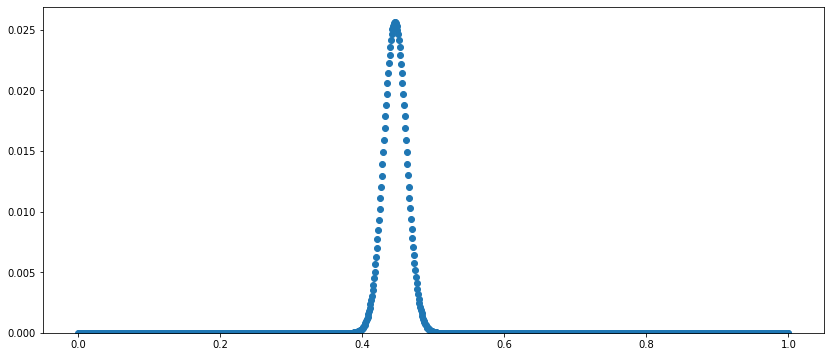

In [2]:
import numpy as np

xs = np.linspace(0, 1, num=1000)
s = binomial_likelyhood(xs)

import matplotlib.pyplot as plt

def plot(ys):
    plt.figure(figsize=(14, 6))
    plt.scatter(xs, ys)
    plt.ylim((0, None))
    plt.show()

plot(ys)

As you can see, the binomial likelyhood is a *continuous* function of $\theta$ rather than the usual representation as a *discrete* function $y$.

## The non-conjugate prior
Like in the example we use a piece-wise linear prior.

In [3]:
def prior(xs):
    line1 = 0.01
    line2 = (2*xs - 2*0.45)
    line3 = (-2*xs + 2*0.55)
    return np.maximum(line1, np.minimum(line2, line3))

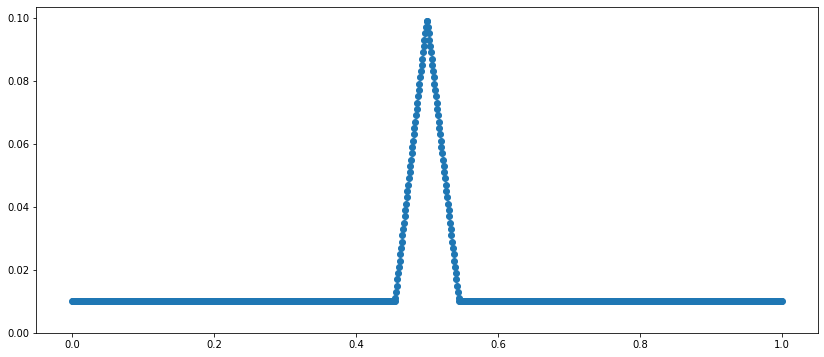

In [4]:
ys2 = prior(xs)

plot(ys2)

## The posterior
We obtain the posterior by multiplying the prior times the likelyhood for every value of $\theta$, and the normalizing the obtain a valid density. It seems like neither the prior nor the data dominate the distribution.

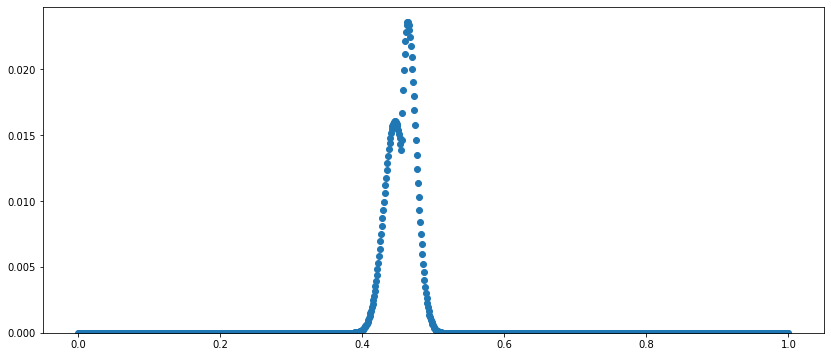

In [5]:
def posterior(prior, likelyhood):
    post = prior * likelyhood
    return post / post.sum()

post = posterior(prior=prior(xs), likelyhood=ys)

plot(post)

## Assuming Less data
Let's assume we had only $n=2$ draws, and one female birth $y=1$. How would the binomial likelyhood and the posterior differ?

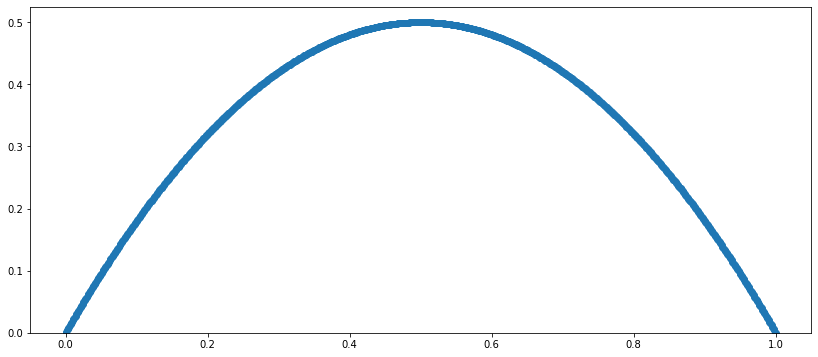

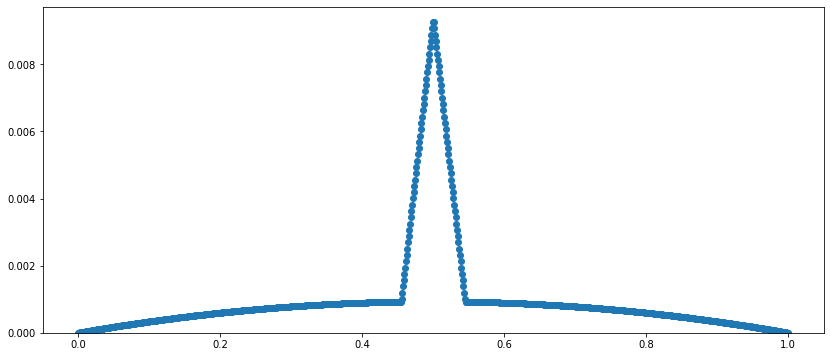

In [6]:
ys4 = binomial_likelyhood(xs, n=2, y=1)
post2 = posterior(prior=prior(xs), likelyhood=ys4)

plot(ys4)
plot(post2)

We can see that the prior distribution dominates the posterior in this case with little data.